# <font color='blue'>Prediction using Unsupervised ML </font>

## <font color=#9400F4><div style="text-align:center"> ~ Rahul Reddy Gajjada</div></font>

### <font color=#940094><div style="text-align:center"> ~ Task 2 - GRIP - The Sparks Foundation</div></font>

### Importing the necessary libs and packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

## Loading the iris dataset

In [ ]:
iris = load_iris()
X = iris.data
X_df = pd.DataFrame(X, columns=("Sepal_Length", "Sepal_Width", "Petal_Length", 
                                "Petal_Width"))
y = iris.target
X_df['species'] = y
print(X_df.head(6))
print(X_df.tail())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
5           5.4          3.9           1.7          0.4        0
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  species
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2


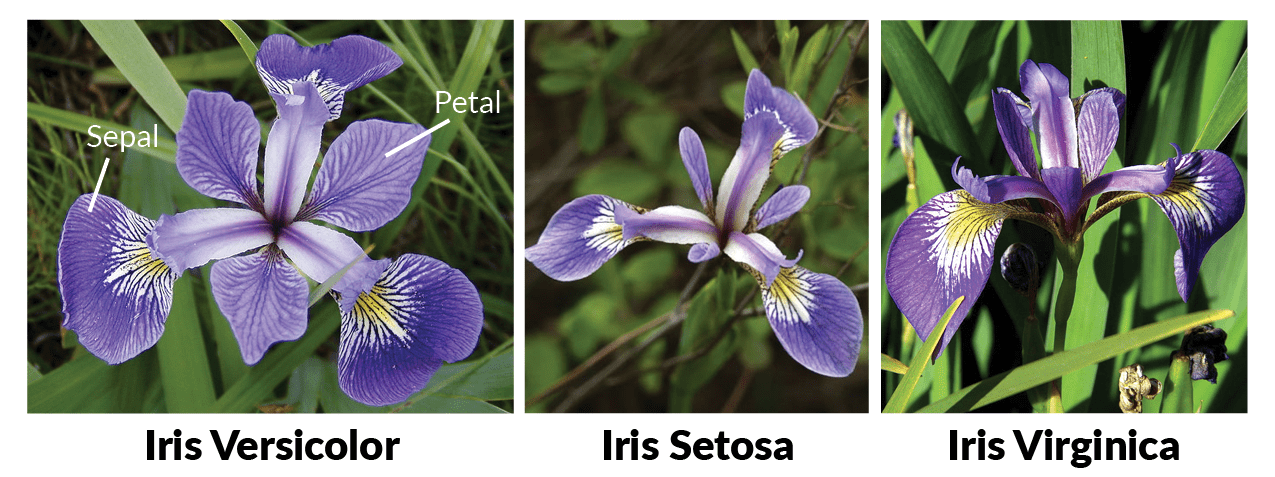

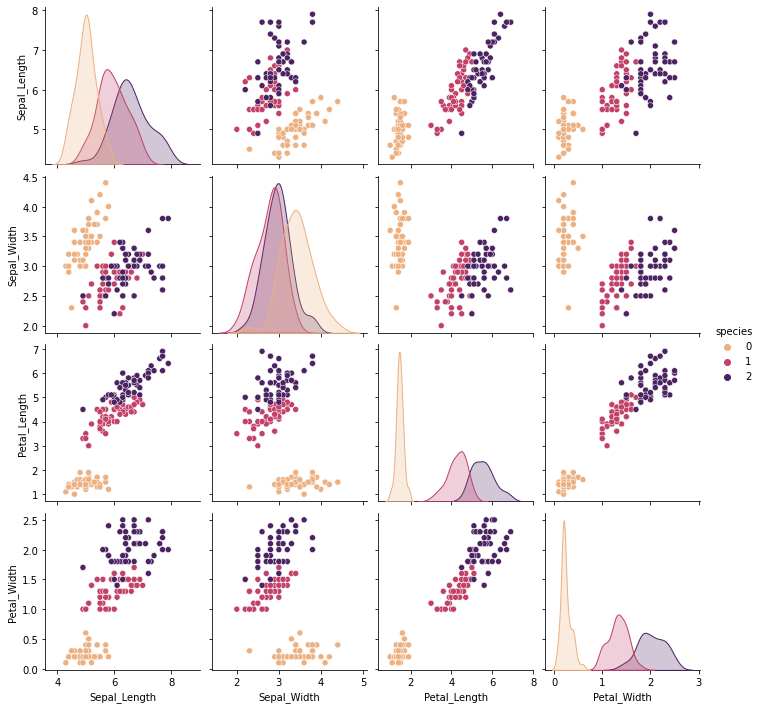

In [ ]:
sns.pairplot(X_df, palette='flare', hue="species", diag_kind="kde")
plt.show()

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### WCSS - Within Cluster Sum of Squares

In [ ]:
# Within Cluster Sum of Squares
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_df)
    wcss.append(kmeans.inertia_)

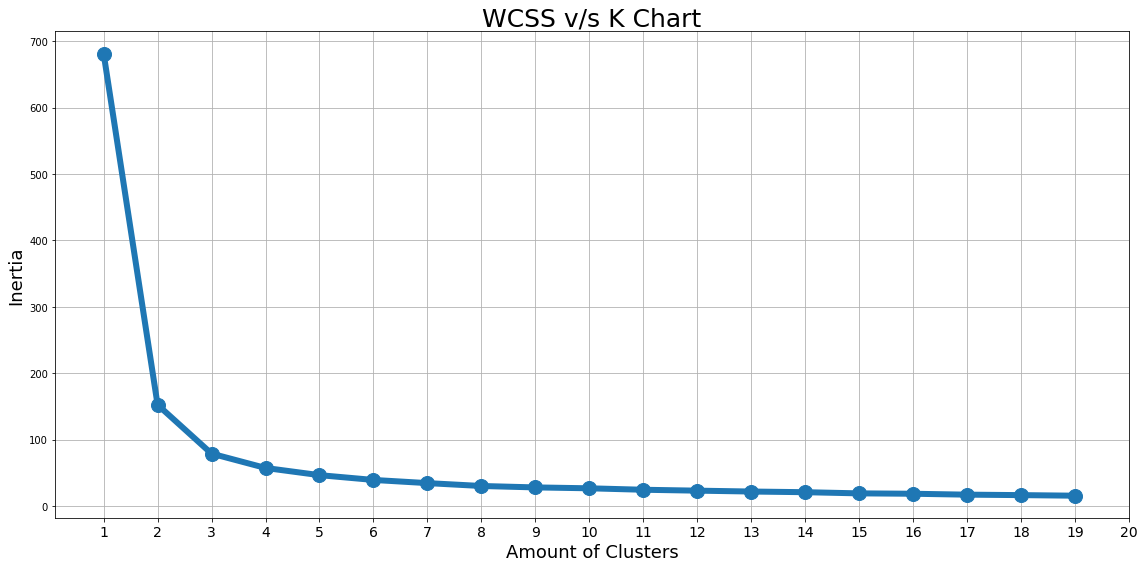

In [ ]:
plt.figure(figsize=(16,8))
plt.title("WCSS v/s K Chart", fontsize=25)
plt.plot(range(1,20), wcss,"-o", linewidth=6, markersize=14)
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=18)
plt.ylabel("Inertia",fontsize=18)
plt.xticks(range(1,21), fontsize=14)
plt.tight_layout()
plt.show()

## From the above diagram, we can see that the total WCSS has stopped reducing drastically after k=3.

# Let us visualize the same with the data instances
### First let us compare using the Petal Length and Petal Width



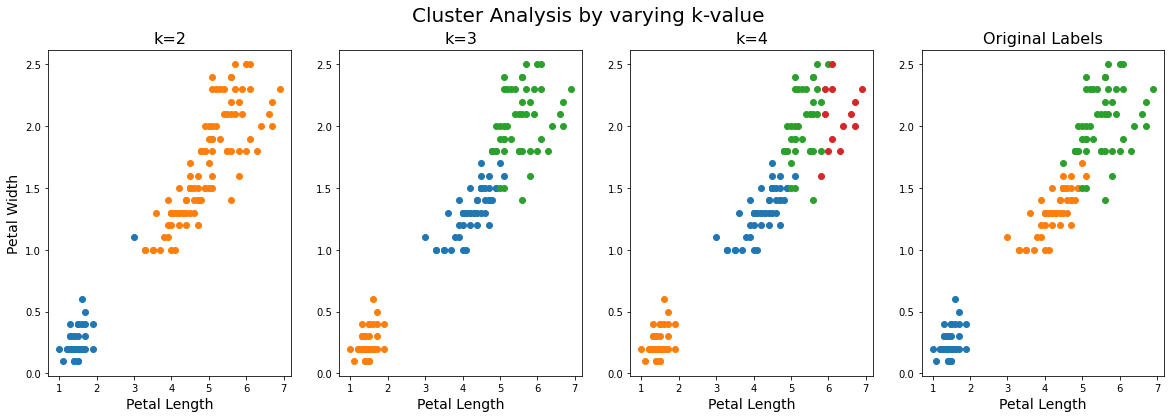

In [ ]:
plt.figure(figsize=(20, 6))

plt.suptitle("Cluster Analysis by varying k-value", fontsize=20)

plt.subplot(1,4,1)
plt.title("k=2", fontsize=16)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
kmeans = KMeans(n_clusters=2)
X_df['labels'] = kmeans.fit_predict(X_df)
plt.scatter(X_df.Petal_Length[X_df.labels == 0], 
            X_df.Petal_Width[X_df.labels == 0])
plt.scatter(X_df.Petal_Length[X_df.labels == 1], 
            X_df.Petal_Width[X_df.labels == 1])

X_df.drop(['labels'], axis=1, inplace=True)

plt.subplot(1,4,2)
plt.title("k=3", fontsize=16)
plt.xlabel("Petal Length", fontsize=14)
kmeans = KMeans(n_clusters=3)
X_df['labels'] = kmeans.fit_predict(X_df)
plt.scatter(X_df.Petal_Length[X_df.labels == 0], 
            X_df.Petal_Width[X_df.labels == 0], cmap=sns.color_palette())
plt.scatter(X_df.Petal_Length[X_df.labels == 1], 
            X_df.Petal_Width[X_df.labels == 1], cmap=sns.color_palette())
plt.scatter(X_df.Petal_Length[X_df.labels == 2], 
            X_df.Petal_Width[X_df.labels == 2], cmap=sns.color_palette())

X_df.drop(['labels'], axis=1, inplace=True)

plt.subplot(1,4,3)
plt.title("k=4", fontsize=16)
plt.xlabel("Petal Length", fontsize=14)
kmeans = KMeans(n_clusters=4)
X_df['labels'] = kmeans.fit_predict(X_df)
plt.scatter(X_df.Petal_Length[X_df.labels == 0], 
            X_df.Petal_Width[X_df.labels == 0])
plt.scatter(X_df.Petal_Length[X_df.labels == 1], 
            X_df.Petal_Width[X_df.labels == 1])
plt.scatter(X_df.Petal_Length[X_df.labels == 2], 
            X_df.Petal_Width[X_df.labels == 2])
plt.scatter(X_df.Petal_Length[X_df.labels == 3], 
            X_df.Petal_Width[X_df.labels == 3])

X_df.drop(['labels'], axis=1, inplace=True)

plt.subplot(1,4,4)
plt.title("Original Labels",fontsize=16)
plt.xlabel("Petal Length", fontsize=14)
plt.scatter(X_df.Petal_Length[X_df.species == 0], 
            X_df.Petal_Width[X_df.species == 0])
plt.scatter(X_df.Petal_Length[X_df.species == 1], 
            X_df.Petal_Width[X_df.species == 1])
plt.scatter(X_df.Petal_Length[X_df.species == 2], 
            X_df.Petal_Width[X_df.species == 2])

plt.show()

### Now, let us compare using the Sepal Length and Sepal Width

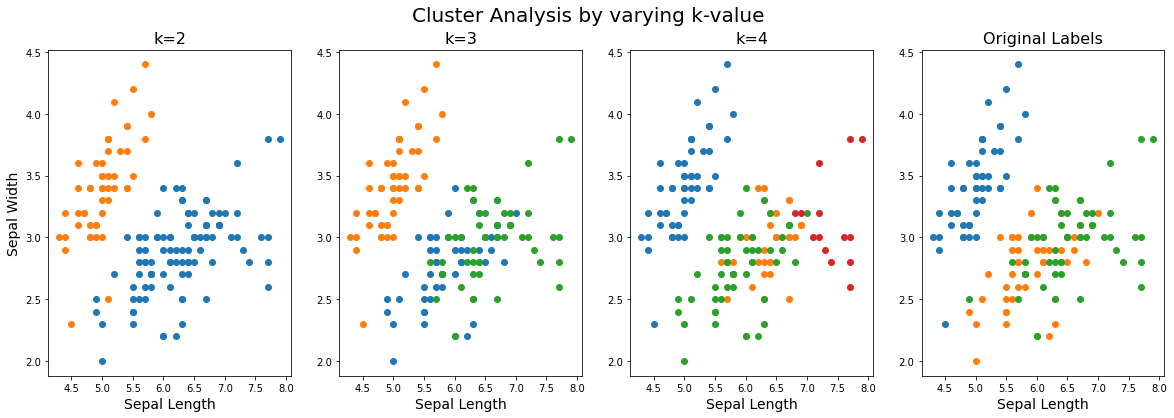

In [ ]:
plt.figure(figsize=(20, 6))

plt.suptitle("Cluster Analysis by varying k-value", fontsize=20)

plt.subplot(1,4,1)
plt.title("k=2", fontsize=16)
plt.xlabel("Sepal Length", fontsize=14)
plt.ylabel("Sepal Width", fontsize=14)
kmeans = KMeans(n_clusters=2)
X_df['labels'] = kmeans.fit_predict(X_df)
plt.scatter(X_df.Sepal_Length[X_df.labels == 0], 
            X_df.Sepal_Width[X_df.labels == 0])
plt.scatter(X_df.Sepal_Length[X_df.labels == 1], 
            X_df.Sepal_Width[X_df.labels == 1])

X_df.drop(['labels'], axis=1, inplace=True)

plt.subplot(1,4,2)
plt.title("k=3", fontsize=16)
plt.xlabel("Sepal Length", fontsize=14)
kmeans = KMeans(n_clusters=3)
X_df['labels'] = kmeans.fit_predict(X_df)
plt.scatter(X_df.Sepal_Length[X_df.labels == 0], 
            X_df.Sepal_Width[X_df.labels == 0])
plt.scatter(X_df.Sepal_Length[X_df.labels == 1], 
            X_df.Sepal_Width[X_df.labels == 1])
plt.scatter(X_df.Sepal_Length[X_df.labels == 2], 
            X_df.Sepal_Width[X_df.labels == 2])

X_df.drop(['labels'], axis=1, inplace=True)

plt.subplot(1,4,3)
plt.title("k=4", fontsize=16)
plt.xlabel("Sepal Length", fontsize=14)
kmeans = KMeans(n_clusters=4)
X_df['labels'] = kmeans.fit_predict(X_df)
plt.scatter(X_df.Sepal_Length[X_df.labels == 0], 
            X_df.Sepal_Width[X_df.labels == 0])
plt.scatter(X_df.Sepal_Length[X_df.labels == 1], 
            X_df.Sepal_Width[X_df.labels == 1])
plt.scatter(X_df.Sepal_Length[X_df.labels == 2], 
            X_df.Sepal_Width[X_df.labels == 2])
plt.scatter(X_df.Sepal_Length[X_df.labels == 3], 
            X_df.Sepal_Width[X_df.labels == 3])

X_df.drop(['labels'], axis=1, inplace=True)

plt.subplot(1,4,4)
plt.title("Original Labels",fontsize=16)
plt.xlabel("Sepal Length", fontsize=14)
plt.scatter(X_df.Sepal_Length[X_df.species == 0], 
            X_df.Sepal_Width[X_df.species == 0])
plt.scatter(X_df.Sepal_Length[X_df.species == 1], 
            X_df.Sepal_Width[X_df.species == 1])
plt.scatter(X_df.Sepal_Length[X_df.species == 2], 
            X_df.Sepal_Width[X_df.species == 2])

plt.show()

### Here, we can clearly observe that **k=3** matches exactly with the **original instances**. Similarly using any **Unsupervised learning** techniques we can classify the data into respective categories even without knowing the original labels.